<a href="https://colab.research.google.com/github/dmorton714/louisville_metro/blob/main/lmg_salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import csv
import numpy as np
import seaborn as sns 

Reads in the sheet from GitHub
<br>
https://data.louisvilleky.gov/datasets/louisville-metro-ky-employee-salary-data/explore
<br>
api link : https://services1.arcgis.com/79kfd2K6fskCAkyg/arcgis/rest/services/Louisville_Metro_KY_Employee_Salary_Data/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson

In [146]:
# df = pd.read_csv('https://raw.githubusercontent.com/dmorton714/louisville_metro/main/SalaryData.csv', encoding='cp1252')
# df.head()
df = pd.read_csv('Louisville_Metro_KY_-_Employee_Salary_Data.csv')

In [147]:
df.drop(columns=['Employee_Name', 'Incentive_Allowance', 'Other'], inplace=True)
df.rename(columns={'CalYear':'Year'}, inplace=True)
df.sort_values(by='Department', inplace=True)
df.drop(df[df['Year'] != 2022].index, inplace=True)
agg_functions = {'Department': 'first', 'YTD_Total': 'sum'}
df = df.groupby(df['Department']).aggregate(agg_functions)
df = df.sort_values('YTD_Total')

# df.to_excel("2021.xlsx") 

# print(df)


In [148]:
# pd.options.display.float_format = '{:.2f}'.format
# print(df)

In [149]:
# df = df.sort_values('YTD_Total')

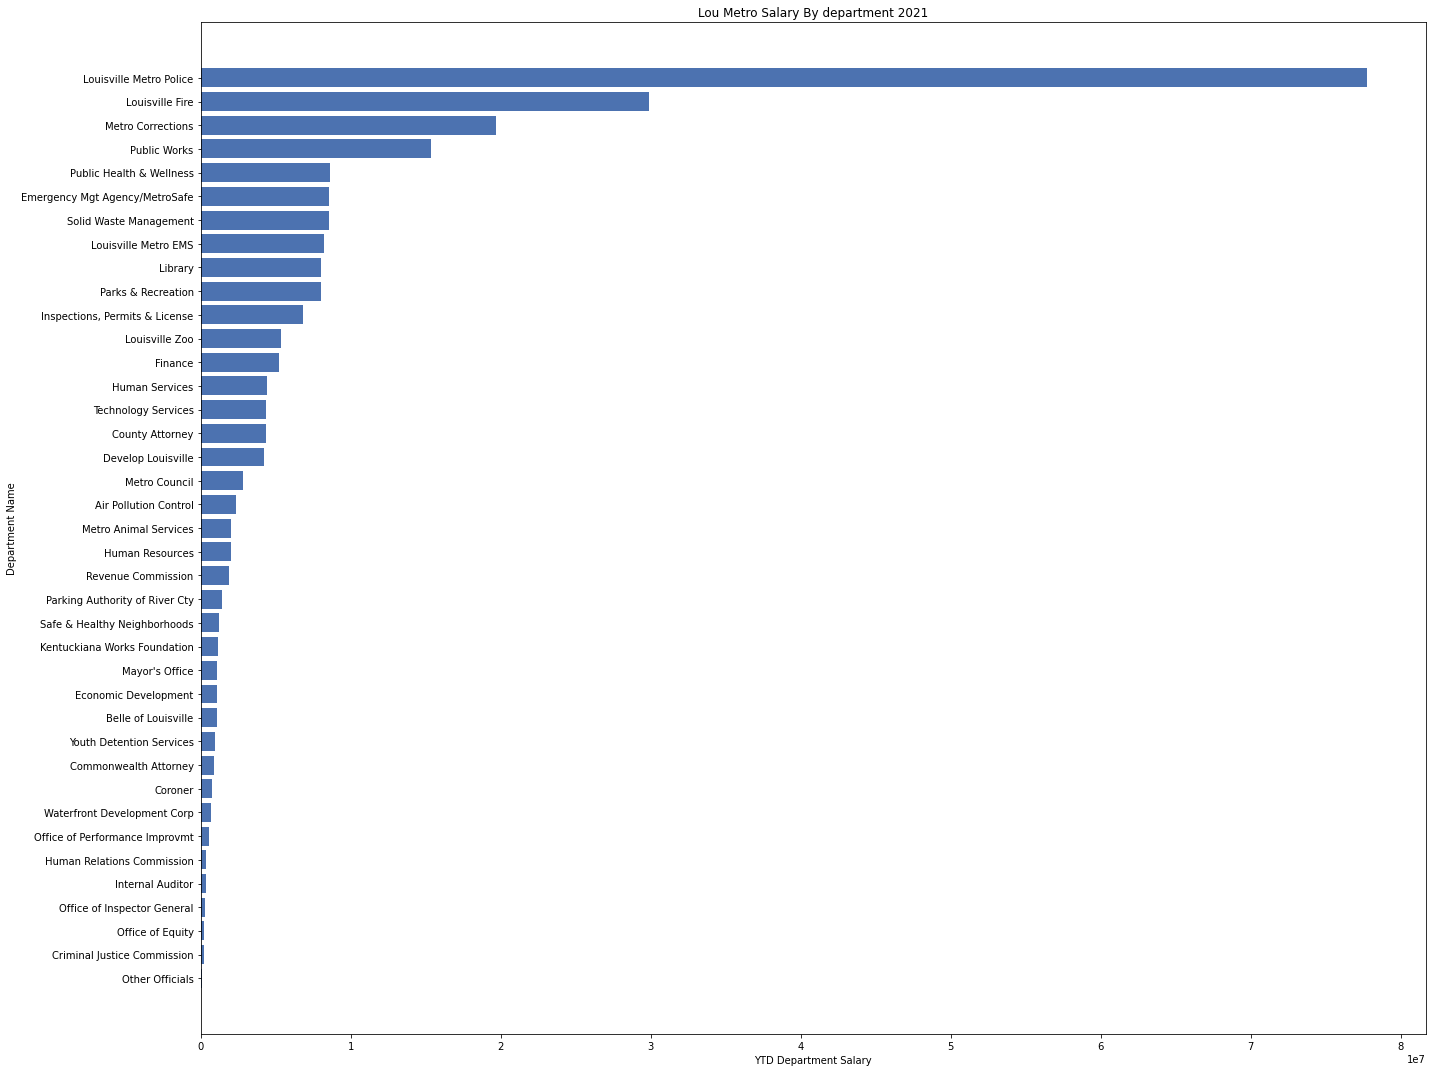

In [154]:
plt.style.use('seaborn-deep')
plt.figure(figsize= (20,15))
plt.barh('Department', 'YTD_Total', data = df)
plt.ylabel('Department Name')
plt.xlabel('YTD Department Salary')
plt.title('Lou Metro Salary By department 2021')
plt.tight_layout()
plt.savefig('2021_plt.jpg')
plt.show()



<AxesSubplot:xlabel='Department'>

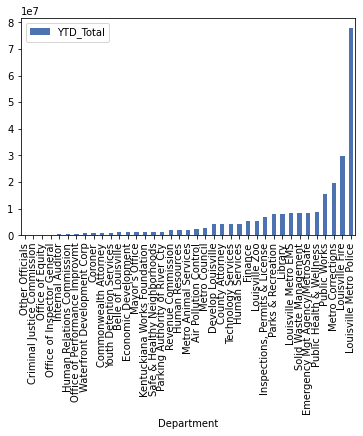

In [151]:
df.plot.bar(x='Department', y='YTD_Total', rot='vertical')


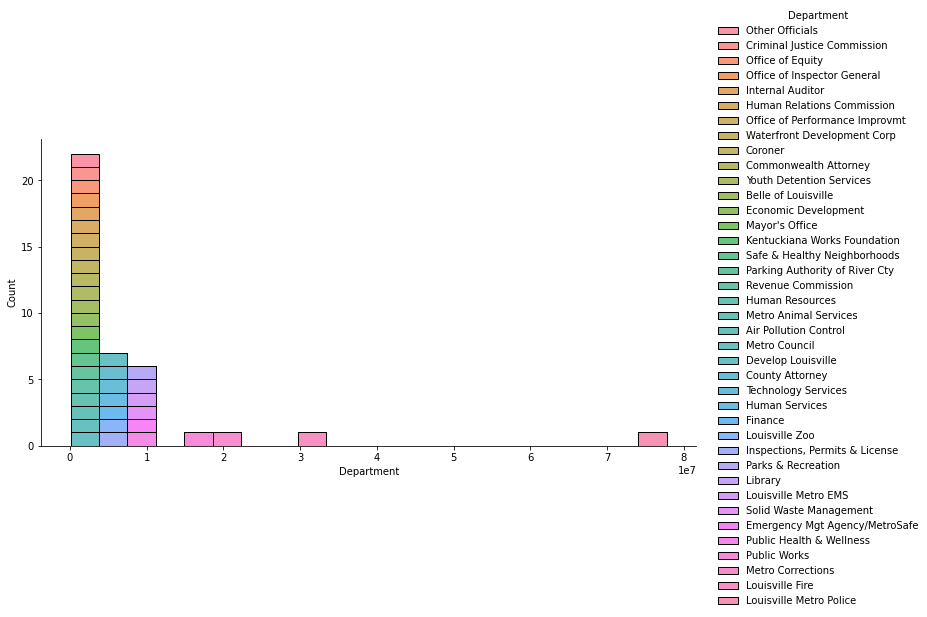

In [152]:
fig_lvl = sns.displot(data=df, x='YTD_Total', hue='Department', multiple='stack', kind='hist', height=5, aspect=2)
fig_lvl.set_axis_labels("Department")

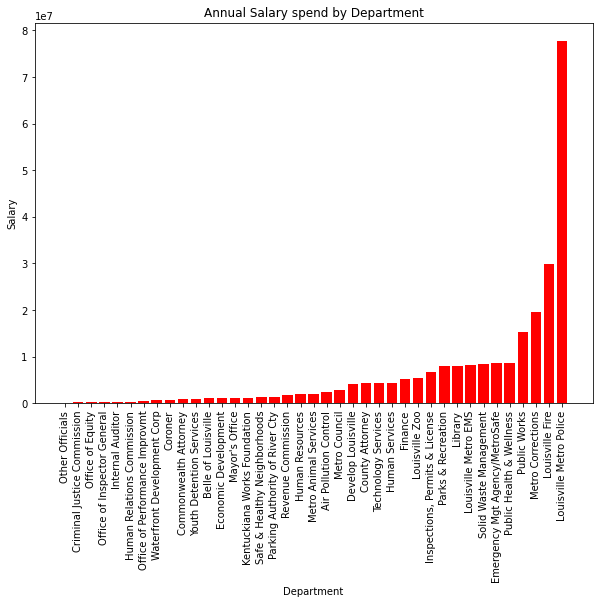

In [153]:


x = df["Department"]
y = df["YTD_Total"]

# setting figure size by using figure() function
plt.figure(figsize = (10,7))
   
# making the bar chart on the data with color red
plt.bar(x, y, color = 'red')
     
# calling the function to add value labels
# addlabels(x, y)
     
# giving title to the plot
plt.title("Annual Salary spend by Department")
     
# giving X and Y labels
plt.xlabel("Department")
plt.ylabel("Salary")
plt.xticks(rotation='vertical')
   
# visualizing the plot
plt.show()